# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import matplotlib
import pandas as pd
import random as rand
import numpy as np
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def roll_dice(n):
    lst = []
    for i in range(n):
        lst.append(rand.choice(range(1,7)))
    return pd.DataFrame(lst, columns=['value'])


#### 2.- Plot the results sorted by value.

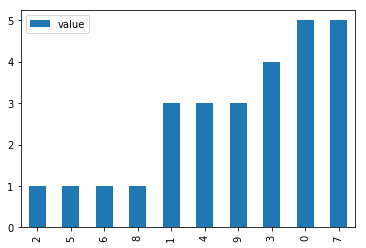

In [3]:
# your code here
df = roll_dice(10)
df.sort_values(by='value').plot(kind='bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

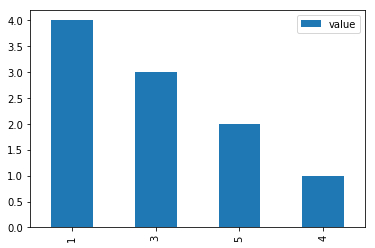

In [4]:
# your code here
pd.DataFrame(df['value'].value_counts()).plot(kind='bar')

In [5]:
"""
your comments here

the first one is not representative as the index follows no pattern in relation to the values
"""

'\nyour comments here\n\nthe first one is not representative as the index follows no pattern in relation to the values\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def mean(dataframe):
    return dataframe.sum()/dataframe.count()

mean(df)

value    2.7
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
freq = pd.DataFrame(df['value'].value_counts())
(((freq.index)*(freq['value'])).sum())/float(freq['value'].sum())

2.7

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here
def median(df):
    sorted_df = df.sort_values(by='value').reset_index(drop=True)
    if df.shape[0] % 2 != 0:
        return float(sorted_df.iloc[(len(sorted_df)/2)])
    else:
        return float(sorted_df.iloc[int(len(sorted_df)/2)-1]['value']+sorted_df.iloc[int(len(sorted_df)/2)]['value'])/2

example = roll_dice(9)
print(example.sort_values(by='value')).reset_index(drop=True)
print(median(example))

   value
0      1
1      1
2      3
3      4
4      5
5      6
6      6
7      6
8      6
5.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
# your code here
def quartiles(df):
    sorted_df = df.sort_values(by='value').reset_index(drop=True)
    if df.shape[0] % 2 != 0:
        q1 = float((sorted_df.iloc[int(len(sorted_df)/4)-1]+sorted_df.iloc[int(len(sorted_df)/4)])/2)
        q3 = float((sorted_df.iloc[int(len(sorted_df)/4*3)]+sorted_df.iloc[int(len(sorted_df)/4*3)+1])/2)
        return q1, median(df), q3
    else:
        q1 = float(sorted_df.iloc[int(len(sorted_df)/4)])
        q3 = float(sorted_df.iloc[int(len(sorted_df)/4)*3])
        return q1, median(df), q3
    
quartiles(example)

(2.0, 5.0, 6.0)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

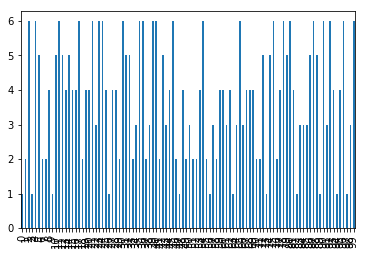

In [10]:
# your code here
ch3 = pd.read_csv('../data/roll_the_dice_hundred.csv')
ch3.drop(['Unnamed: 0'], axis =1, inplace=True)
ch3['value'].plot(kind='bar')

In [11]:
"""
your comments here
We see nothing
"""

'\nyour comments here\nWe see nothing\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [12]:
# your code here
print(mean(ch3)['value'], median(ch3))

(3.74, 4.0)


#### 3.- Now, calculate the frequency distribution.


In [13]:
# your code here
freq_ch3 = pd.DataFrame(ch3['value'].value_counts())
freq_ch3

,value
6,23
4,22
2,17
3,14
5,12
1,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

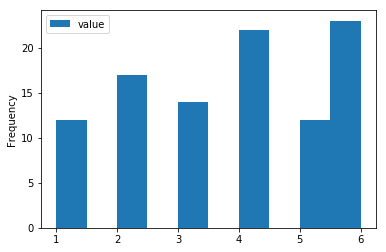

In [24]:
# your code here
ch3.plot(kind='hist', x = 'roll')

In [25]:
"""
your comments here:

we can see the histogram has negative skewness, thats why the mean is not 3.5 but 4.
"""

'\nyour comments here:\n\nwe can see the histogram has negative skewness, thats why the mean is not 3.5 but 4.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

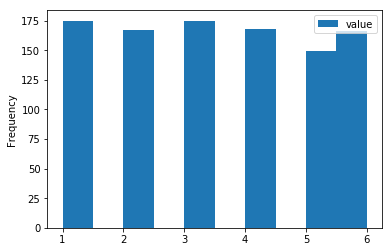

In [35]:
# your code here
q5 = pd.read_csv('../data/roll_the_dice_thousand.csv').drop(['Unnamed: 0'], axis=1)
q5.plot(kind='hist', x='roll')

In [36]:
"""
your comments here

It is much equilibrated as the sample is larger. Probably the mean would be closer to 3.5.
"""

'\nyour comments here\n\nIt is much equilibrated as the sample is larger. Probably the mean would be closer to 3.5.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

The mean will be from 30-40, and the std aproximately 15.


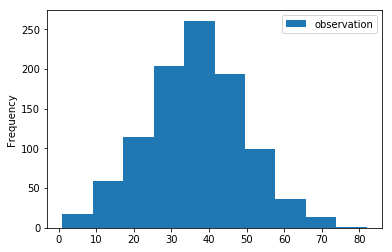

In [44]:
# your code here
ch4 = pd.read_csv('../data/ages_population.csv')
freq_ch4 = pd.DataFrame(ch4['observation'].value_counts())
ch4.plot(kind='hist')

print('The mean will be from 30-40, and the std aproximately 15.')

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [45]:
# your code here
ch4.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [46]:
"""
your comments here

Yes, i guessed it considering it like a normal distribution.
"""

'\nyour comments here\n\nYes, i guessed it considering it like a normal distribution.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

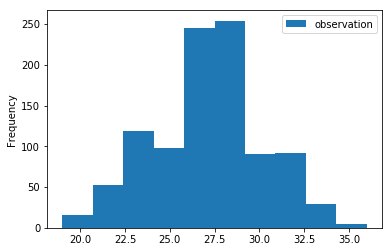

In [48]:
# your code here
ch4_2 = pd.read_csv('../data/ages_population2.csv')
freq_ch4_2 = pd.DataFrame(ch4_2['observation'].value_counts())
ch4_2.plot(kind='hist')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [51]:
"""
your comments here:

Range is much lower, from 19 to 36, and probably the std is much lower too for the same reason.
"""

'\nyour comments here:\n\nRange is much lower, from 19 to 36, and probably the std is much lower too for the same reason.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [52]:
# your code here
ch4_2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [53]:
"""
your comments here:

being the range lower, std is lower as all observation are much closer to the mean. Also the mean is lower as max and 
min are also lower.
"""

'\nyour comments here:\n\nbeing the range lower, std is lower as all observation are much closer to the mean. Also the mean is lower as max and \nmin are also lower.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

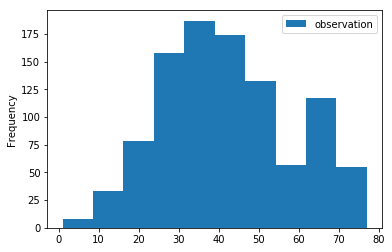

In [54]:
# your code here
ch5 = pd.read_csv('../data/ages_population3.csv')
freq_ch5 =  pd.DataFrame(ch5['observation'].value_counts())
ch5.plot(kind='hist')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [55]:
# your code here
ch5.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [56]:
"""
your comments here

there is positive skewness have larger std because of the outliers in range 60-70, that don't follow a normal distribution.

"""

"\nyour comments here\n\nWe have larger std because of the outliers in range 60-70, that don't follow a normal distribution.\n\n"

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [57]:
# your code here
set(pd.qcut(ch5['observation'], 4))

{Interval(0.999, 30.0, closed='right'),
 Interval(30.0, 40.0, closed='right'),
 Interval(40.0, 53.0, closed='right'),
 Interval(53.0, 77.0, closed='right')}

In [58]:
"""
your comments here:

Not much difference, just two years. The quartiles are not giving much information.
"""

'\nyour comments here\n\nnot much difference, just two years.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [59]:
# your code here
set(pd.qcut(ch5['observation'], 10))

{Interval(0.999, 22.0, closed='right'),
 Interval(22.0, 28.0, closed='right'),
 Interval(28.0, 32.0, closed='right'),
 Interval(32.0, 36.0, closed='right'),
 Interval(36.0, 40.0, closed='right'),
 Interval(40.0, 45.0, closed='right'),
 Interval(45.0, 50.0, closed='right'),
 Interval(50.0, 57.0, closed='right'),
 Interval(57.0, 67.0, closed='right'),
 Interval(67.0, 77.0, closed='right')}

In [60]:
"""
your comments here

We can see that observations are more dense in the first range as the percentiles are shorter.
"""

'\nyour comments here\n\nWe can see that observations are more dense in the first range as the percentiles are shorter.\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""